 This is a binary classification project which uses textual data of the news for predicting if it is real or fake.

     So, we will use logistic regression model for training data

## Dataset information :


       id: unique id for a news article
       title: the title of a news article
       author: author of the news article
       text: the text of the article; could be incomplete
       label: a label that marks whether the news article is real or fake:
       
               1: Fake news
               0: real News

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#load the dataset
dataset=pd.read_csv("G:/project csv/train.csv")

In [3]:
dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
#To see the information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
dataset.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [6]:
dataset.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [7]:
# rows and columns in dataset
dataset.shape

(20800, 5)

In [8]:
df=dataset.drop_duplicates()

In [9]:
df.shape 

(20800, 5)

In [10]:
df.duplicated().sum()

0

In [11]:
# checking the number of missing values in dataset

dataset.isnull().sum()
# column wise missing data

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [12]:
#checking the number of missing values in dataset
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [13]:
df['title'].value_counts()

Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence              5
The Dark Agenda Behind Globalism And Open Borders                                                               5
Schools All Over America Are Closing On Election Day Due To Fears Of Violence                                   4
“If Trump Loses, I’m Grabbing My Musket”: Former Congressman Ready to Go Full Revolution                        4
Public vs. Media on War                                                                                         4
                                                                                                               ..
Report: Only 6% of Millennials Said Their Social Media Was a ’Completely True’ Depiction of Them - Breitbart    1
Hillary Clinton, Donald Trump, Iraq Inquiry: Your Wednesday Evening Briefing - The New York Times               1
Shall We Save Civilization, or Not? - American Herald Tribune                           

In [14]:
df['title'].unique()

array(['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It',
       'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart',
       'Why the Truth Might Get You Fired', ...,
       'N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times',
       'Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times',
       'NATO, Russia To Hold Parallel Exercises In Balkans'], dtype=object)

In [15]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encode=OrdinalEncoder()
encode=ordinal_encode.fit_transform(df)
encode

encode_df_columns=ordinal_encode.get_feature_names_out()
encode_df_columns

encode_df=pd.DataFrame(encode)
encode_df.columns=encode_df_columns

encode_df

,id,title,author,text,label
0,0.0,7609.0,940.0,8021.0,1.0
1,1.0,5854.0,908.0,6297.0,0.0
2,2.0,18702.0,826.0,19125.0,1.0
3,3.0,145.0,1776.0,17464.0,1.0
4,4.0,8529.0,1498.0,13019.0,1.0
...,...,...,...,...,...
20795,20795.0,12919.0,1762.0,13385.0,0.0
20796,20796.0,10800.0,498.0,18958.0,0.0
20797,20797.0,9965.0,2617.0,15468.0,0.0
20798,20798.0,10851.0,140.0,10697.0,1.0


<AxesSubplot: >

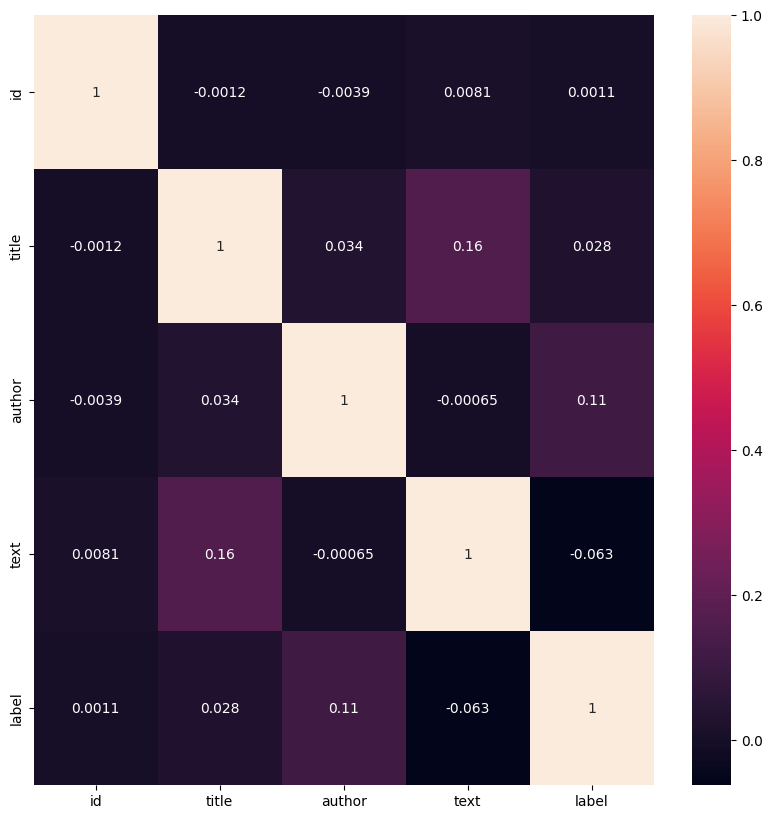

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(encode_df.corr(),annot=True)

In [17]:
# Separating the data and label
x=encode_df.drop('label',axis=1).copy()
y=encode_df['label'].copy()

In [18]:
#replace  null 
from sklearn.impute import KNNImputer
imputer=KNNImputer()
x_impute=imputer.fit_transform(encode_df)
x_impute

array([[0.0000e+00, 7.6090e+03, 9.4000e+02, 8.0210e+03, 1.0000e+00],
       [1.0000e+00, 5.8540e+03, 9.0800e+02, 6.2970e+03, 0.0000e+00],
       [2.0000e+00, 1.8702e+04, 8.2600e+02, 1.9125e+04, 1.0000e+00],
       ...,
       [2.0797e+04, 9.9650e+03, 2.6170e+03, 1.5468e+04, 0.0000e+00],
       [2.0798e+04, 1.0851e+04, 1.4000e+02, 1.0697e+04, 1.0000e+00],
       [2.0799e+04, 1.8320e+04, 9.9400e+02, 4.8500e+02, 1.0000e+00]])

In [19]:
x_impute_columns=imputer.get_feature_names_out()
x_impute_columns

array(['id', 'title', 'author', 'text', 'label'], dtype=object)

In [20]:
x_impute=pd.DataFrame(x_impute)
x_impute.columns=x_impute_columns

In [21]:
x_impute

,id,title,author,text,label
0,0.0,7609.0,940.0,8021.0,1.0
1,1.0,5854.0,908.0,6297.0,0.0
2,2.0,18702.0,826.0,19125.0,1.0
3,3.0,145.0,1776.0,17464.0,1.0
4,4.0,8529.0,1498.0,13019.0,1.0
...,...,...,...,...,...
20795,20795.0,12919.0,1762.0,13385.0,0.0
20796,20796.0,10800.0,498.0,18958.0,0.0
20797,20797.0,9965.0,2617.0,15468.0,0.0
20798,20798.0,10851.0,140.0,10697.0,1.0


In [22]:
x=x_impute
x

,id,title,author,text,label
0,0.0,7609.0,940.0,8021.0,1.0
1,1.0,5854.0,908.0,6297.0,0.0
2,2.0,18702.0,826.0,19125.0,1.0
3,3.0,145.0,1776.0,17464.0,1.0
4,4.0,8529.0,1498.0,13019.0,1.0
...,...,...,...,...,...
20795,20795.0,12919.0,1762.0,13385.0,0.0
20796,20796.0,10800.0,498.0,18958.0,0.0
20797,20797.0,9965.0,2617.0,15468.0,0.0
20798,20798.0,10851.0,140.0,10697.0,1.0


In [23]:
x.isnull().sum()


id        0
title     0
author    0
text      0
label     0
dtype: int64

In [24]:
#outlier
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: >

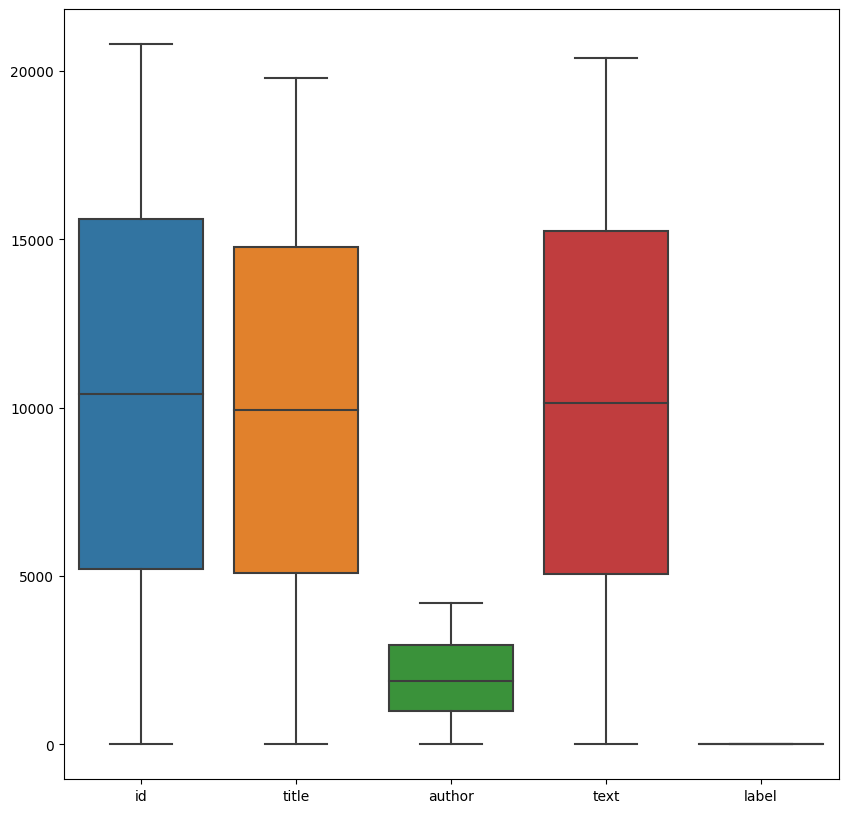

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x)

In [26]:
# scaling 
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
mini_max= MinMaxScaler()

# Fit the scaler to your data
x=mini_max.fit_transform(x)

x

array([[0.00000000e+00, 3.84254116e-01, 2.23809524e-01, 3.93475595e-01,
        1.00000000e+00],
       [4.80792346e-05, 2.95626704e-01, 2.16190476e-01, 3.08903606e-01,
        0.00000000e+00],
       [9.61584692e-05, 9.44450056e-01, 1.96666667e-01, 9.38189845e-01,
        1.00000000e+00],
       ...,
       [9.99903842e-01, 5.03231997e-01, 6.23095238e-01, 7.58793230e-01,
        0.00000000e+00],
       [9.99951921e-01, 5.47974952e-01, 3.33333333e-02, 5.24748590e-01,
        1.00000000e+00],
       [1.00000000e+00, 9.25159075e-01, 2.36666667e-01, 2.37920039e-02,
        1.00000000e+00]])

In [27]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data
x=scaler.fit_transform(x)
x

array([[-1.73196754, -0.40771424, -0.9031386 , -0.36255769,  0.99875078],
       [-1.73180099, -0.71750193, -0.9302934 , -0.65492846, -1.00125078],
       [-1.73163445,  1.55039108, -0.99987759,  1.52055429,  0.99875078],
       ...,
       [ 1.73163445,  0.00816029,  0.51994286,  0.90036873, -1.00125078],
       [ 1.73180099,  0.16455453, -1.58200871,  0.09126144,  0.99875078],
       [ 1.73196754,  1.48296151, -0.85731487, -1.6405775 ,  0.99875078]])

In [28]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [29]:



# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [30]:
# Define the XGBoost classifier
model = xgb.XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary:logistic'
)

# Train the model
model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)


Accuracy: 100.0
